<a href="https://colab.research.google.com/github/jaleftwi/MAT421_Modules/blob/main/MAT421_ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module F** *Numerical Differentiation*

---
The next section of MAT421 will cover methods used in determining derivatives numerically rather than analytically. Topics included in the current Module F will be the following:

*   20.1 Numerical Differentiation Problem Statement
*   20.2 Finite Difference Approximating Derivatives
*   20.3 Approximating of Higher Order Derivatives
*   20.4 Numerical Differentiation with Noise

## **Section 20.1 Numerical Differentiation Problem Statement**
---
Function derivatives are essential components that are used in modeling flux or change of all kinds. Yet as important as the derivative is- determing it practically proves difficult when real world functions and trends are not explicitly known. Since this means that the derivative is unable to be determing analytically, as an alternative we may observe all the collective data points and determine a model for the derivative numerically.

To better understand the numerical methods included, it is helpful break down the components of a numerical grid. Simply put, a "numerical grid" is a set of evenly spaced points taken in an interval within the domain. What seperates the evenly spaced points is known as the "spacing", often  reffered to as the "step-size". Thus the span of the specified interval may be broken up into an ordered set of points {x1, x2, x3, ...} evenly spaced by step-size "h".

Before going any further, it should be touched upon that while many functions may be continuous (ie observations may be taken at any point from within a specified range), our measurement and analytical tools will often instead use discrete representation (ie countable observations noted at specific points) to pratically carry out calculations and modeling.

For both the continuous function (the true analytical function) as well the discrete represention of a function; the methods discussed are still aptly applicable in estimating the derivative (by contextualizing the function using a numerical grid). We will also examine the accuracy of some of the mentioned functions in this section.

## **Section 20.2 Finite Difference Approximating Derivatives**
---
Analyticaly, the derivative (the slope at the point) at x = a for function f(x) can be determined by: 

f'(x) = Lim(m→a)((f(x) - f(a))/(x-a))

Finite difference is an appoximation method that uses values in the neighborhood of the selected point to estimate the slope (and therefore the derivative). There are three main finite difference methods to consider.

1) Firstly, forward difference method uses the slope of a straight line that connects (xj, f(xj)) and (xj+1, f(xj+1)):

> f'(xj) = (f(xj+1) - f(xj)) / (xj+1 - xj) ≈ (f(xj+1) - f(xj)) / (h)

2) Secondly, backward difference method uses the slope of a straight line that connects (xj-1, f(xj-1)) and (xj, f(xj)):

> f'(xj) = (f(xj) - f(xj-1)) / (xj - xj-1) ≈ (f(xj) - f(xj-1)) / (h)

3) Lastly, the central difference method uses the slope of a straight line that connects (xj-1, f(xj-1)) and (xj+1, f(xj+1)):

> f'(xj) = (f(xj+1) - f(xj-1)) / (xj+1 - xj-1) ≈ (f(xj+1) - f(xj-1)) / (2h)

For each of these methods, "h" represents the step size chosen.

It is worth mentioning the concept of order. The notation for order is O(x). Generally, the basic function with O(x) indicates the overall complexity of an examined function. (ie 3x is O(x), 3x^2 is O(x^2), etc). While it is not always the case, higher order function typically are more elaborate may be more accurate- but at the cost of using more resources in numerical evaluation.

For forward and backward difference methods, the order is O(h). However, the central difference method is O(h^2), and is also more accurate. 

The approximation process can also be done and monitored using computer code in Python.

**NOTE:** The code below is supplied by the MAT421 textbook *Python Programming and Numerical Methods - A Guide for Engineers and Scientists Methods*, whose copyright belongs to *Elsevier*. Additionally, the code was accessed through *https://pythonnumericalmethods.berkeley.edu/*

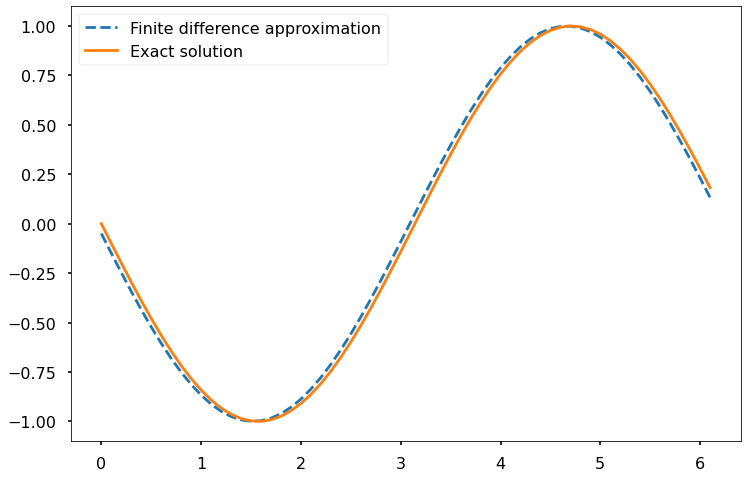

0.049984407218554114


In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(x) 

# compute vector of forward differences
forward_diff = np.diff(y)/h 
# compute corresponding grid
x_diff = x[:-1:] 
# compute exact solution
exact_solution = -np.sin(x_diff) 

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

It is important to note that the approximation method is not exact. No matter what method is chosen to estimate the function and its derivative- due to the limitations of attempting it numerically rather than analytically will produce some error in the model.

## **Section 20.3 Approximating of Higher Order Derivatives**
---
In addition to determining the first-order derivative, it sometimes may be necessary to also approximate a higher order derivative (such as f''(x) or f'''(x)). Through clever arrangement and use of the Taylor series, a possible approximation may still be found.

Lets say for the Taylor series, a = xn. In the attempt to approximate nearby points xn-1 and xn+1, the Taylor expansion would produce:

1.  f(xn-1) ≈ f(xn) - h\*f'(xn) + ((h^2)(f''(xn))/2) - ((h^3)(f'''(xn))/6) + ...
2.  f(xn+1) ≈ f(xn) + h\*f'(xn) + ((h^2)(f''(xn))/2) + ((h^3)(f'''(xn))/6) + ...

Through clever manipulation of these two expansions, the combined equation may be rearranged into solving for the higher derivatives. In the instance of the second order derivative, such a manipulation would yield:

f''(xn) ≈ ((f(xn+1) - 2*f(xn) + f(xn-1))/(h^2))

Note that the complexity of these appoximations is similar to that of the central method. In this approximation, the complexity is O(h^2).

## **Section 20.4 Numerical Differentiation with Noise**
---
Occasionally, data may not be completely accurate. Often times, observed data is affected by error. This error between the observation and theoretical mathematical projection is also known as "noise". Noise itself is present in all sorts of real world cases; unavoidable as consequence of the limited scope of measuring instruments or the presence of external variables.

Through the accumulation of noise (shown in omega and epsilon below), the result is that it becomes much more difficult to give an approximation and its derivative.

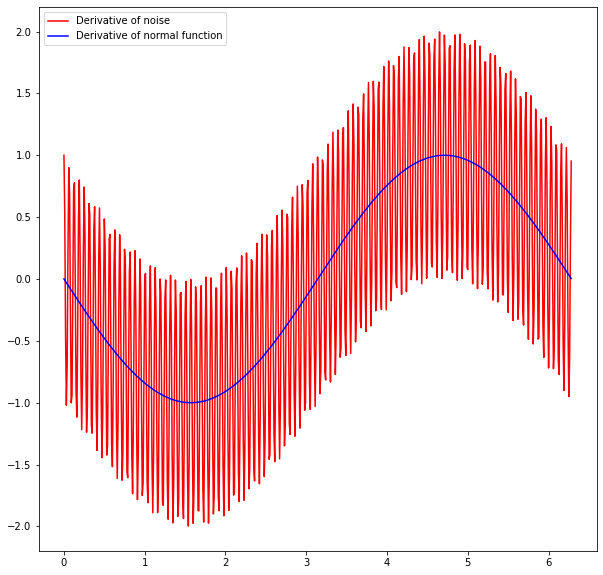

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
x = np.arange(0, 2*np.pi, 0.01) 

omega = 100
epsilon = 0.01

y = -np.sin(x)
yError = y + epsilon*omega*np.cos(x*omega)

plt.figure(figsize = (10,10))
plt.plot(x, yError, 'r-', label = 'Derivative of noise')
plt.plot(x, y, 'b-', label = 'Derivative of normal function')
plt.legend()
plt.show()

As shown above, the presence of noise can drastically hurt the reliability of data and can even make it unusable.